<a href="https://colab.research.google.com/github/JuanDaGue/Rlativity-/blob/main/Trasformaciones_de_Lorentz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatividad


Notas y ejercicios



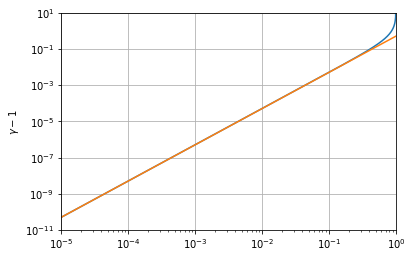

In [ ]:
from numpy import log10,sqrt,logspace 
us=logspace(log10(1e-5),log10(0.9999),1000) 
gammas=1/sqrt(1-us**2)-1 
gamma_approx=us**2/2

import matplotlib.pyplot as plt 

fig=plt.figure() 
ax=fig.gca()
ax.plot(us,gammas,label='Exacto') 
ax.plot(us,gamma_approx,label='Aprox. binomial')

ax.set_xscale("log") 
ax.set_yscale("log") 
ax.set_xlim((1e-5,1e0)) 
ax.set_ylim((1e-11,1e1))
ax.set_label(r"$u/c$") 
ax.set_ylabel(r"$\gamma-1$") 
ax.grid()


In [ ]:
def Lambda_TLE(u): 
  from numpy import zeros 
  Lambda=zeros((4,4))
  #Factor de Lorentz 

  umag=(u[0]**2+u[1]**2+u[2]**2)**0.5 
  gamma=(1-umag**2)**(-0.5)
  Lambda[0,0]=gamma 
  Lambda[0,1:]=-u*gamma 
  Lambda[1:,0]=-u*gamma 
  for i in range(1,4): 
    for j in range(1,4): 
      dij=0 
      if i==j:dij=1 
      Lambda[i,j]=dij+(gamma-1)*u[i-1]*u[j-1]/umag**2 
      return Lambda


In [ ]:
from numpy import array 
u=array([0.2,0.0,0.0]) 
Lambda=Lambda_TLE(-u)

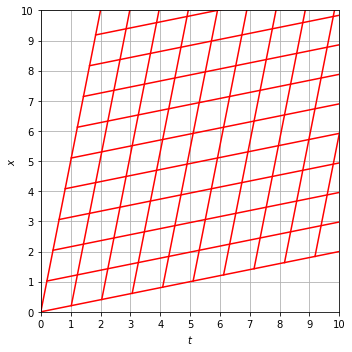

In [ ]:
#Escoge valores de x: 

from numpy import linspace 
rmax=10 
xs=linspace(0,rmax,rmax+1,endpoint=True) 
ts=linspace(0,rmax,rmax+1,endpoint=True)

#Calcula valores de t' y x' usando la matriz:

from numpy import zeros_like 
tps=zeros_like(xs) 
xps=zeros_like(xs)

from numpy import matmul
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(5,5)) 
ax=fig.gca()
for t in xs: 
  for i,x in enumerate(xs): 
    tps[i],xps[i],yp,zp=matmul(Lambda,[t,x,0,0]) 
  ax.plot(tps,xps,'r-')
for x in xs:
  for i,t in enumerate(ts): 
    tps[i],xps[i],yp,zp=matmul(Lambda,[t,x,0,0])
  ax.plot(tps,xps,'r-')

#Decoración

ax.set_xticks(xs) 
ax.set_yticks(xs) 
ax.set_xlabel("$t$") 
ax.set_ylabel("$x$") 
ax.set_xlim((0,rmax)) 
ax.set_ylim((0,rmax))
ax.grid() 
fig.tight_layout()

In [ ]:

def mapa_TLE(ux=0.0,uy=0.0,uz=0.0,
             rmax=10,ngrid=10,nticks=10,
             interact=False):
    from numpy import array
    u=array([ux,uy,uz])
    Lambda=Lambda_TLE(-u)

    #Escoge valores de x:
    from numpy import linspace
    xs=linspace(0,rmax,ngrid+1,endpoint=True)
    ts=linspace(0,rmax,ngrid+1,endpoint=True)

    #Calcula valores de t' y x' usando la matriz:
    from numpy import zeros_like
    tps=zeros_like(xs)
    xps=zeros_like(xs)

    from numpy import matmul

    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca()

    for t in xs:
        for i,x in enumerate(xs):
            tps[i],xps[i],yp,zp=matmul(Lambda,[t,x,0,0])
        ax.plot(tps,xps,'r-',alpha=0.5)

    for x in xs:
        for i,t in enumerate(ts):
            tps[i],xps[i],yp,zp=matmul(Lambda,[t,x,0,0])
        ax.plot(tps,xps,'r-',alpha=0.5)

    #Decoración
    ax.set_xticks(linspace(0,rmax,nticks+1,endpoint=True))
    ax.set_yticks(linspace(0,rmax,nticks+1,endpoint=True))
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x$")
    ax.set_xlim((0,rmax))
    ax.set_ylim((0,rmax))
    ax.grid()
    fig.tight_layout()
    if not interact:
        return fig

In [ ]:
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)
interact(mapa_TLE,
         ux=widgets.FloatSlider(value=1e-3,min=1e-3,max=0.99,step=0.01,**opciones),
         uy=widgets.FloatSlider(value=0.0,min=0.0,max=0.99,step=0.01,**opciones),
         uz=widgets.FloatSlider(value=0.0,min=0.0,max=0.99,step=0.01,**opciones),
         rmax=fixed(10),ngrid=fixed(10),interact=fixed(True)
        );

interactive(children=(FloatSlider(value=0.001, continuous_update=False, description='ux', max=0.99, min=0.001,…

In [ ]:
xs

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
#import matplotlib
#matplotlib.use('nbagg')
import numpy as np

In [ ]:

from scipy.stats import norm
def plot_function(size = 100, bins = 10, loc=0, scale=1, color='red'):
    data = norm.rvs(size=size, loc=loc, scale=scale)
    binwidth = (max(data) - min(data))/ bins
    plt.hist(data, 
             bins=np.arange(min(data), max(data) + binwidth, binwidth),
             color=color)


In [ ]:
from ipywidgets import interact 
interact(plot_function,)
None
 

interactive(children=(IntSlider(value=100, description='size', max=300, min=-100), IntSlider(value=10, descrip…

In [ ]:
ngrid=5
endpoint=4
xs=linspace(0,rmax,ngrid+1,endpoint=True)
xs

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [ ]:
def sen(n=0.0,NT=10.0,interact=False):
  x=np.linspace(0,2*np.pi,NT)
  y=np.sin(n*x)
  fig=plt.figure(figsize=(5,5))
  ax=fig.gca()
  ax.plot(x,y)
  fig.tight_layout()
  if not interact:
        return fig


 


In [ ]:
from ipywidgets import interact,fixed,widgets
interact(sen,n=widgets.FloatSlider(value=1e-3,min=0,max=10,step=2,**opciones),NT=widgets.IntSlider(value=1e-3,min=10,max=100,step=10),interact=fixed(True))

interactive(children=(FloatSlider(value=0.001, continuous_update=False, description='n', max=10.0, step=2.0), …

<function __main__.sen>

In [ ]:
opciones

{'continuous_update': False}